In [87]:
# For data manipulation and file operations
import pandas as pd
import numpy as np
import os

# For visualizations
import matplotlib.pyplot as plt

# TensorFlow and Keras for deep learning
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


In [89]:
# List all subdirectories in the raw_data folder
base_path = r"C:\Users\sydul\Downloads\raw_data"

dirs = os.listdir(base_path)

for dir in dirs:
    dir_path = os.path.join(base_path, dir)  # Properly join path
    if os.path.isdir(dir_path):  # Only count if it's a folder
        files = os.listdir(dir_path)
        print(dir +' Fabric has ' + str(len(files)) + ' images')

chequered Fabric has 120 images
paisley Fabric has 120 images
plain Fabric has 120 images
polka-dotted Fabric has 120 images
striped Fabric has 120 images
zigzagged Fabric has 120 images


In [91]:
# List all subdirectories in the raw_data folder
base_path = r"C:\Users\sydul\Downloads\raw_data"

count =0
dirs = os.listdir(base_path)
for dir in dirs:
    dir_path = os.path.join(base_path, dir)  # Properly join path
    if os.path.isdir(dir_path):  # Only count if it's a folder
        files = os.listdir(dir_path)
        print(dir +' Fabric has ' + str(len(files)) + ' images')
        count=count + len(files)
print('image Fabric has ' + str(count) + ' images')


chequered Fabric has 120 images
paisley Fabric has 120 images
plain Fabric has 120 images
polka-dotted Fabric has 120 images
striped Fabric has 120 images
zigzagged Fabric has 120 images
image Fabric has 720 images


In [93]:
# load image into Array as Dataset

In [95]:
base_dir = r"C:\Users\sydul\Downloads\raw_data"
img_size = 255
batch = 32

In [97]:
train_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed =123,
                                                      validation_split =0.2,
                                                      subset = 'training',
                                                      batch_size = batch,
                                                      image_size = (255, 255))
val_ds = tf.keras.utils.image_dataset_from_directory(base_dir,
                                                      seed =123,
                                                      validation_split =0.2,
                                                      subset = 'validation',
                                                      batch_size = batch,
                                                      image_size = (255, 255))

Found 720 files belonging to 6 classes.
Using 576 files for training.
Found 720 files belonging to 6 classes.
Using 144 files for validation.


In [99]:
Fabric_name = train_ds.class_names
Fabric_name

['chequered', 'paisley', 'plain', 'polka-dotted', 'striped', 'zigzagged']

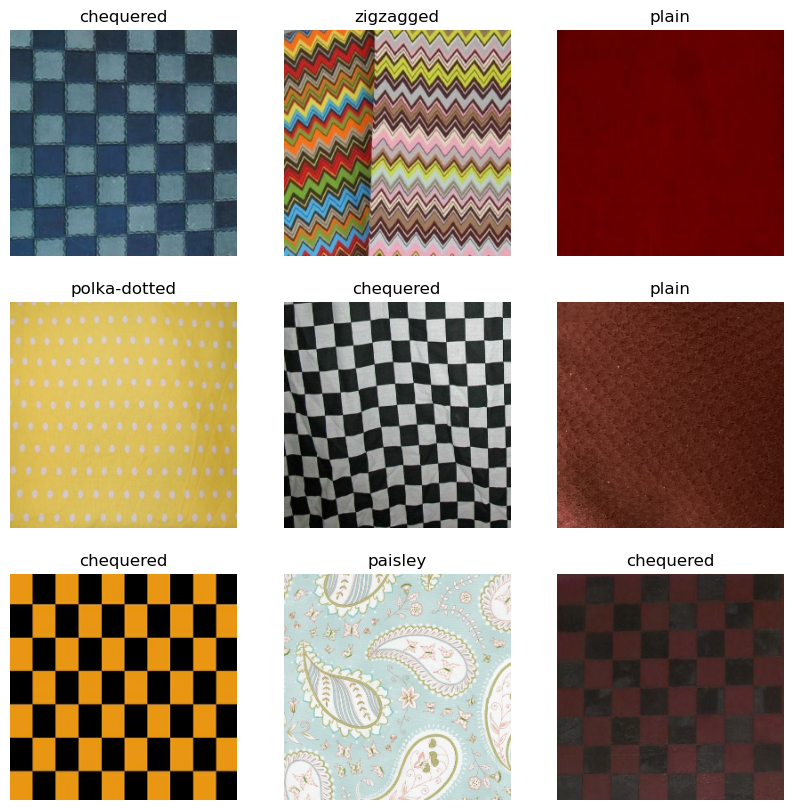

In [101]:
i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(Fabric_name[labels[i]])
        plt.axis('off')

In [103]:
AUTOTUNE = tf.data.AUTOTUNE

In [105]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [107]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [109]:
# Data Augmentation

In [111]:
data_augmentation = Sequential([
    layers.RandomFlip('horizontal', input_shape = (255, 255,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

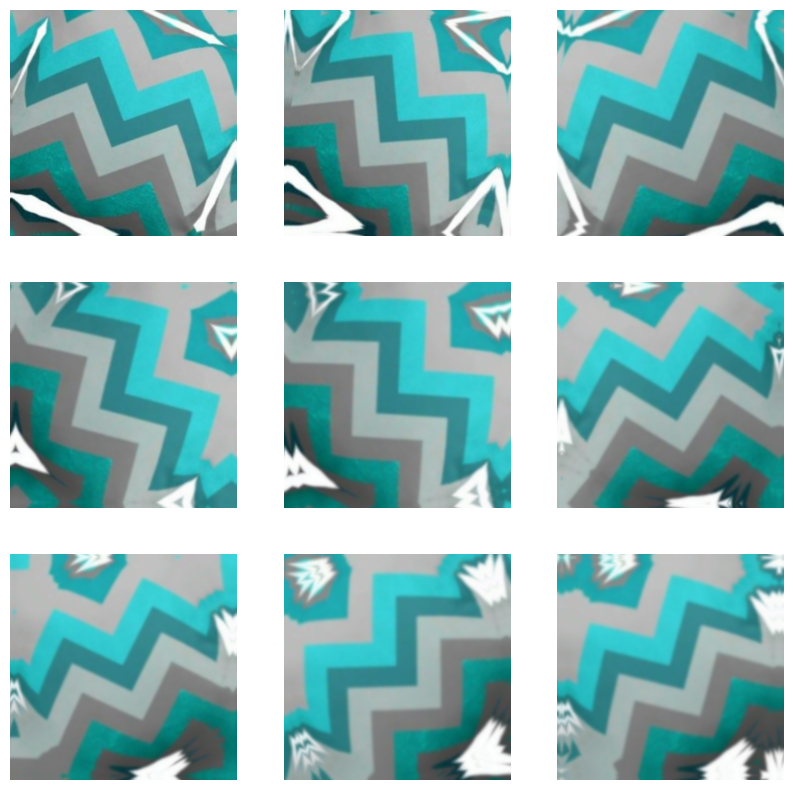

In [113]:
i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')
       

In [115]:
#Model creation

In [117]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding = 'same',activation = 'relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding = 'same',activation = 'relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding = 'same',activation = 'relu'),
    MaxPooling2D(),
    Dropout(0.4),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(6)
])

In [119]:
model.compile(optimizer='adam',
            loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

In [121]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)            │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 255, 255, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 255, 255, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 127, 127, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61504)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      31,490,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,517,222 (120.23 MB)

 Trainable params: 31,517,222 (120.23 MB)

 Non-trainable params: 0 (0.00 B)

In [123]:
history = model.fit(train_ds, epochs=20, validation_data =val_ds)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 19s 783ms/step - accuracy: 0.1772 - loss: 2.7667 - val_accuracy: 0.3125 - val_loss: 1.7317
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 724ms/step - accuracy: 0.2943 - loss: 1.7324 - val_accuracy: 0.3194 - val_loss: 1.6252
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 662ms/step - accuracy: 0.2895 - loss: 1.6358 - val_accuracy: 0.2708 - val_loss: 1.6405
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 504ms/step - accuracy: 0.3525 - loss: 1.6226 - val_accuracy: 0.3819 - val_loss: 1.5618
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 513ms/step - accuracy: 0.4535 - loss: 1.4618 - val_accuracy: 0.4097 - val_loss: 1.4849
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 502ms/step - accuracy: 0.4258 - loss: 1.4662 - val_accuracy: 0.4167 - val_loss: 1.4427
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 556ms/step - accuracy: 0.4440 - loss: 1.4110 - val_accuracy: 0.4167 - val_loss: 1.5009
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 568ms/step - accuracy: 0.4415 - loss: 1.4367 - val_accurac

In [125]:
input_image = tf.keras.utils.load_img(r"C:\Users\sydul\Downloads\raw_data\zigzagged\zigzagged_0000003.jpg",target_size=(255,255))
input_image_array = tf.keras.utils.img_to_array(input_image)
input_image_exp_dim = tf.expand_dims(input_image_array,0)

predictions = model.predict(input_image_exp_dim)
result = tf.nn.softmax(predictions[0])
Fabric_name[np.argmax(result)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


'zigzagged'

In [127]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path,target_size=(255,255))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The image belongs to ' +  Fabric_name[np.argmax(result)] + ' with a score of ' + str(np.max(result)*100)
    return outcome
   

In [129]:
classify_images(r"C:\Users\sydul\Downloads\sample\chequered_0000000.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


'The image belongs to chequered with a score of 97.76155352592468'

In [131]:
model.save('Fabric_Model_cnn.h5')